# Problem 3

In [62]:
# lib imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import and load data 
facebook_graph_dataframe = pd.read_csv(
    "data/p3/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start", "end"],
)

In [63]:
# printing the dataframe
facebook_graph_dataframe

,start,end
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [73]:
# using netwrokx python library
import networkx as nx

facebook_graph = nx.from_pandas_edgelist(facebook_graph_dataframe, "start", "end")

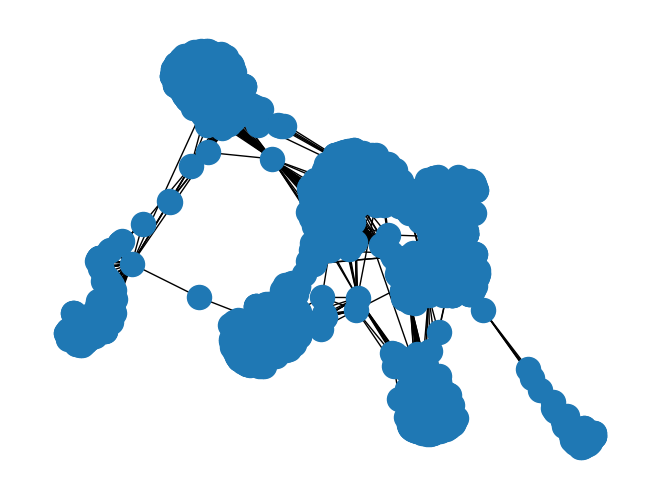

In [14]:
# using nx draw function 
nx.draw(facebook_graph)

The above graph also dose not make any sense, as visually none of the characters can be pointed at.
So need to explore other techniques to plot to identify any important concepts.
By, going throught the networkx graph genrators, I found layouts so i will try some them to find any unique characterstics in the dataset.

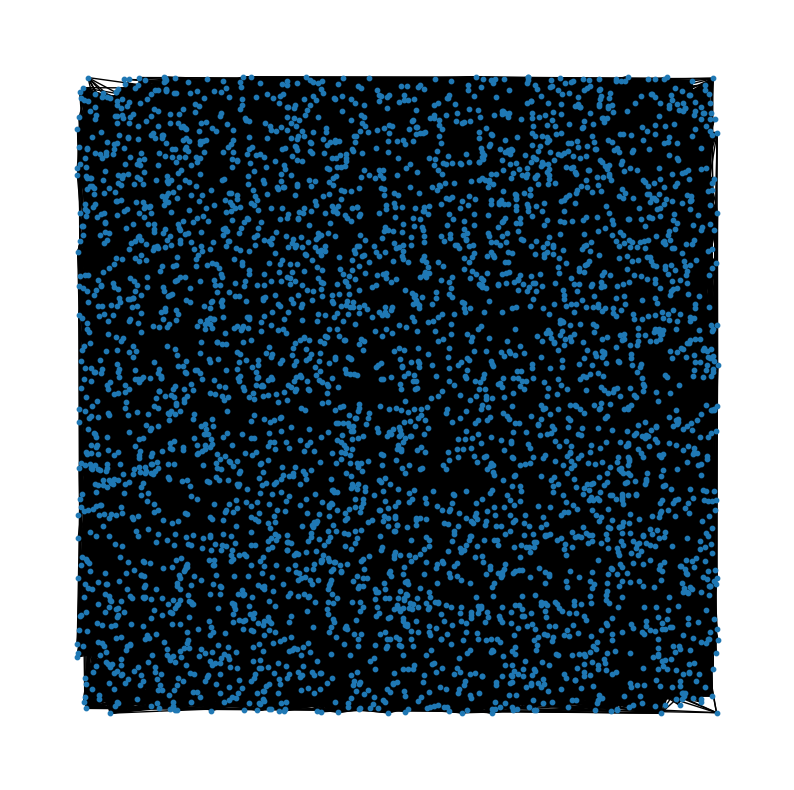

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")
# random layout graph
pos = nx.random_layout(facebook_graph)
# drawing the graph to make some sense as above did not
nx.draw_networkx(facebook_graph, 
                 pos=pos, ax=ax, node_size=10, with_labels=False)

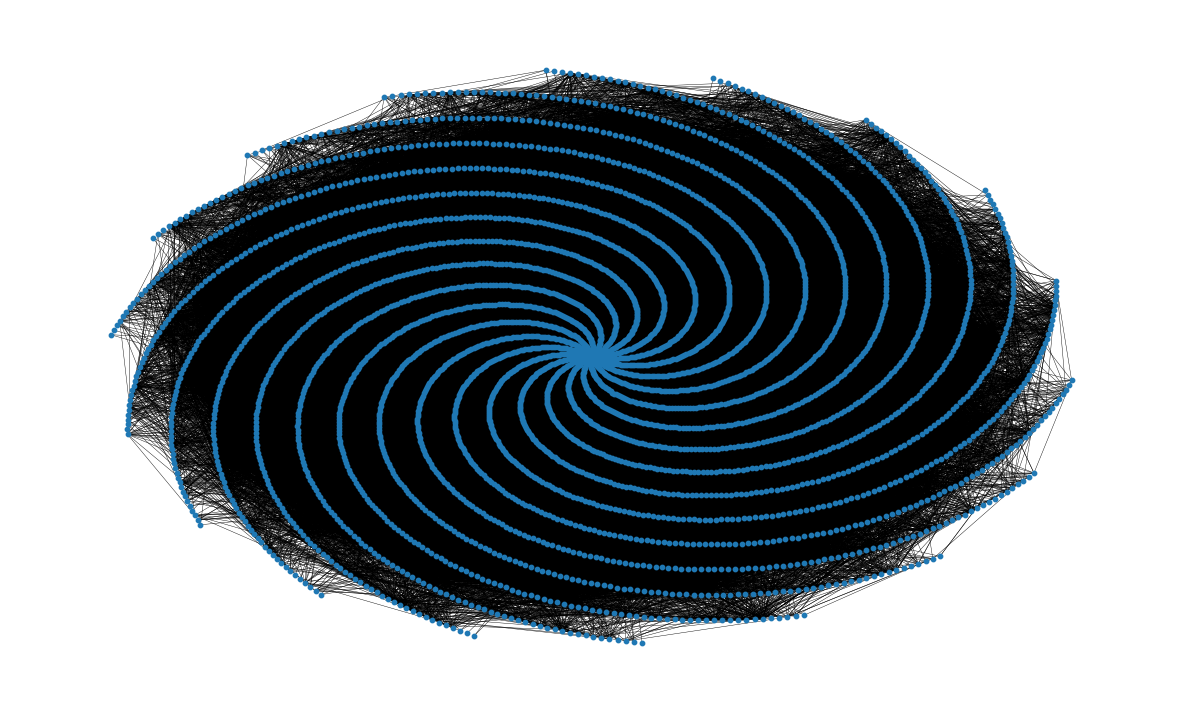

In [40]:
pos = nx.spiral_layout(facebook_graph)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(facebook_graph, pos=pos, ax=ax, node_size=10, with_labels=False, width = 0.3)

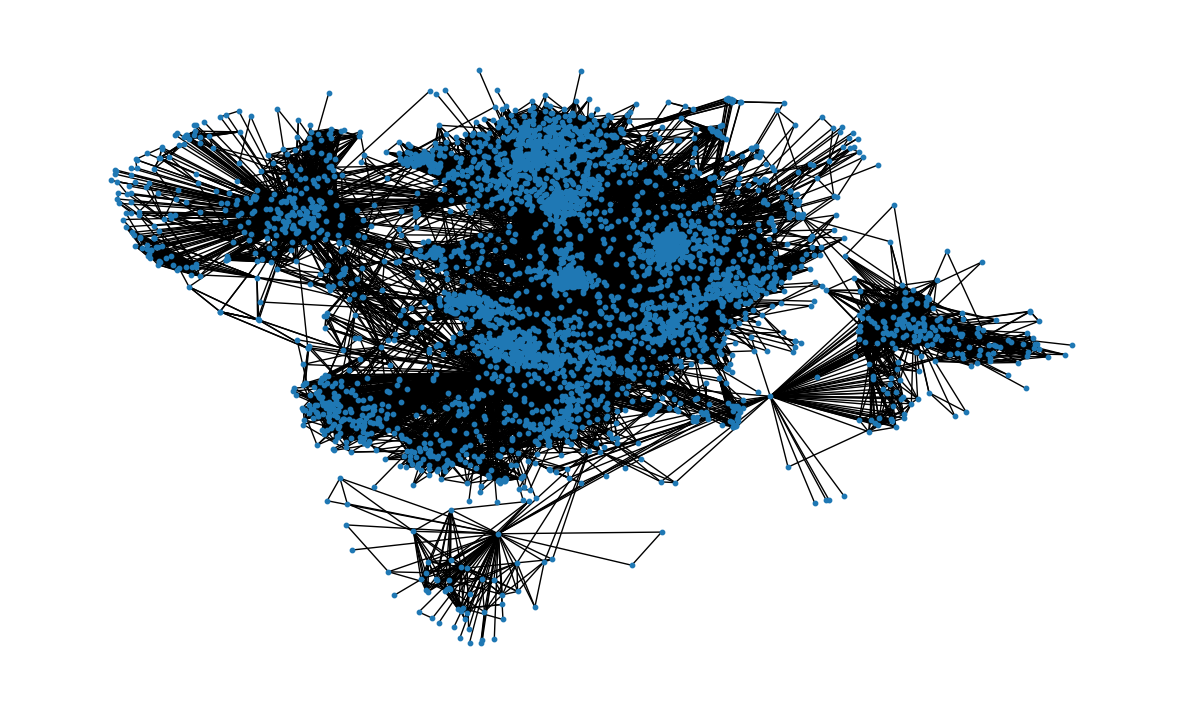

In [126]:
spring_layout_pos = nx.spring_layout(facebook_graph, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(facebook_graph, pos=spring_layout_pos, ax=ax, node_size=10, with_labels=False)

I.	By exploring the different graph representations in the networkx the random layout did not give a representation of what the data in graph is and the spiral is more useless, the above dataset representation the spring layout visualization looks useful. The nodes in the graph looks highly interconnected as expected from a relation ship based design, as facebook creates a node for each user and connects the friends of each user to the respective node. This means we might have clusters in the graph dataset, as people of a group might be separated like for example there are three instances in the above graph.

ii)degree distribution of the network

In [75]:
num_edges = facebook_graph.number_of_edges()
num_nodes = facebook_graph.number_of_nodes()
print('edges', num_edges)
print('nodes', num_nodes)

edges 88234
nodes 4039


In [76]:
degree_of_graph = [d for _, d in facebook_graph.degree()]

In [77]:
np.mean(degree_of_graph)


43.69101262688784

Text(0.5, 1.0, 'Degree Distribution')

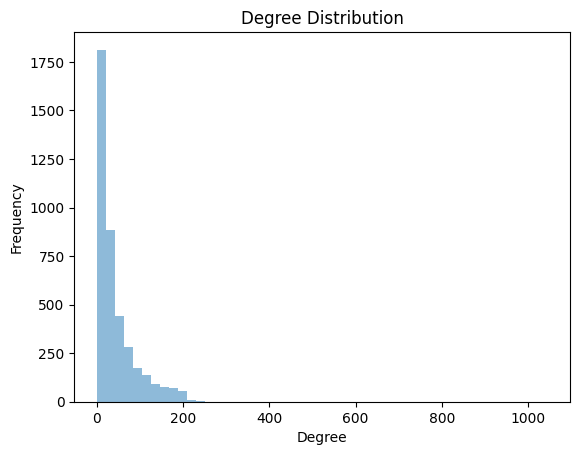

In [147]:
plt.hist(degree_of_graph, bins=50, alpha=0.5)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')

Check for powerlaw

In [148]:
import powerlaw
# checking for powerlaw using the library
results = powerlaw.Fit(degree_of_graph, discrete=True)
print(results.power_law.alpha)
print(results.power_law.xmin)

Calculating best minimal value for power law fit
2.510263154767209
47.0


power 1.0109665086696757e-08
Does not follow power law.


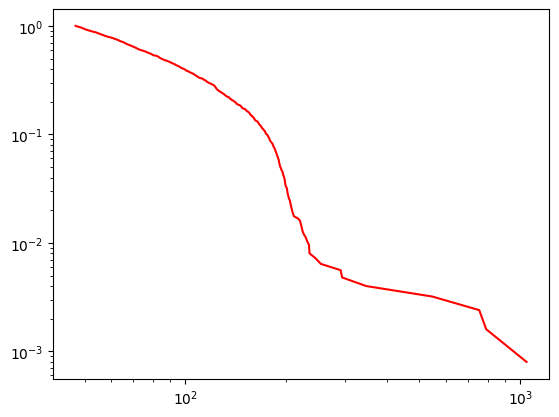

In [149]:
fit.plot_ccdf(color='r', linewidth=1.5)

# Perform a power law test
R, p = results.distribution_compare('power_law', 'exponential')
print("power", p)

# check the power law distribution results
if p < 0.05:
    print("Does not follow power law.")
else:
    print("Follows power law")

In [150]:
degree_centrality_graph = nx.centrality.degree_centrality(facebook_graph) 
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

Text(0, 0.5, 'Frequency')

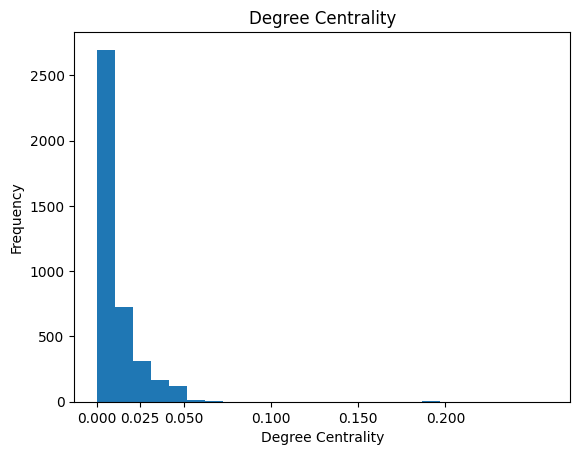

In [151]:
plt.hist(degree_centrality_graph.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")

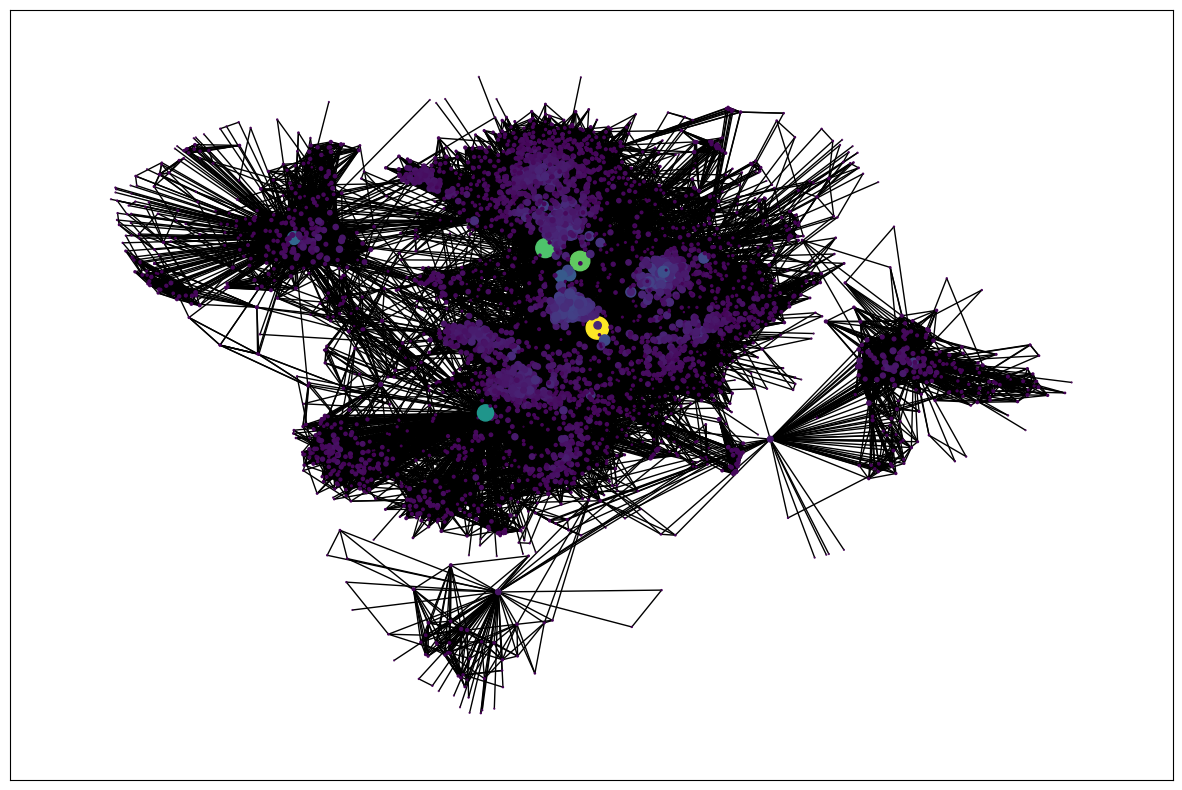

In [132]:
node_color = [20000.0 * facebook_graph.degree(v) for v in facebook_graph]
node_size =  [v * 1000 for v in degree_centrality_graph.values()]
plt.figure(figsize=(15,10))
# draw graph
nx.draw_networkx(facebook_graph, pos=spring_layout_pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )

II.	The graph has edges 88234 and nodes 4039, the average degree of node is 43.69101262688784. By the plot we can see that the graph has highest number of 1 path between the nodes in the graph making a different meaning as they might be new to the set or they outliers. Also the degree centrality that show the number of links held by each node showed that the users have centrality lesser than 0.05. This also seems that they are not very interconnected well in this network so many nodes have low degree centralities. The graph also represents the nodes with high degree centralities. By the observation of the centrality only we can say that the dataset dose not follow power law. 

The power distribution for graph is checked using the https://pypi.org/project/powerlaw/ library. The power law distribution for the graphs degree distribution is false as the power is lesser than 0.05, the power is 1.0109665086696757e-08 is very small to follow the same.

iii) clustering coefficient of the network 

In [172]:
# calc facebook_graph cluster coefficient
facebook_graph_cluster_coeff = nx.average_clustering(facebook_graph)

In [173]:
# create random network with same number of nodes and edges as the facebook_graph
random_graph_generated = nx.gnm_random_graph(num_nodes, num_edges)

# calc clustering coefficient of the random network
random_graph_generated_cluster_coeff = nx.average_clustering(random_graph_generated)

In [174]:
# create a regular network
degree_of_regular_graph = int(num_edges/num_nodes)
regular_graph_generated = nx.random_regular_graph(degree_of_regular_graph, (num_nodes+1))

# calc clustering coefficient of regular network
random_graph_generated_cluster_coeff = nx.average_clustering(regular_graph_generated)

In [175]:
print("Cluster coefficient of the facebook network:", facebook_graph_cluster_coeff)
print("Cluster coefficient of the random network:", random_graph_generated_cluster_coeff)
print("Cluster coefficient of the regular network:", random_graph_generated_cluster_coeff)

Clustering coefficient of the facebook network: 0.6055467186200876
Clustering coefficient of the random network: 0.004413012729844477
Clustering coefficient of the regular network: 0.004413012729844477


Text(0, 0.5, 'Counts')

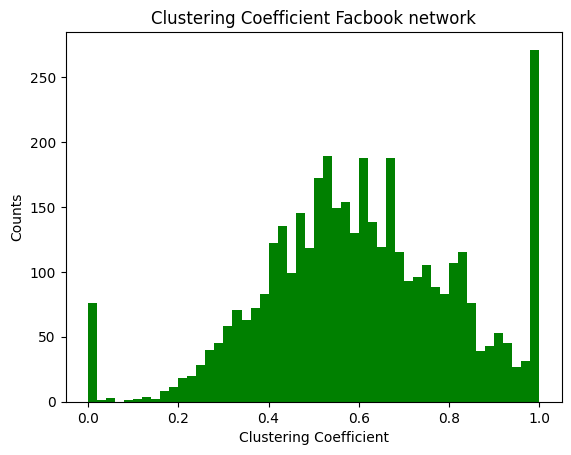

In [176]:
# plotting lustering coefficient of facebook graph
plt.hist(nx.clustering(facebook_graph).values(), bins=50, color='green')
plt.title("Clustering Coefficient Facbook network")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

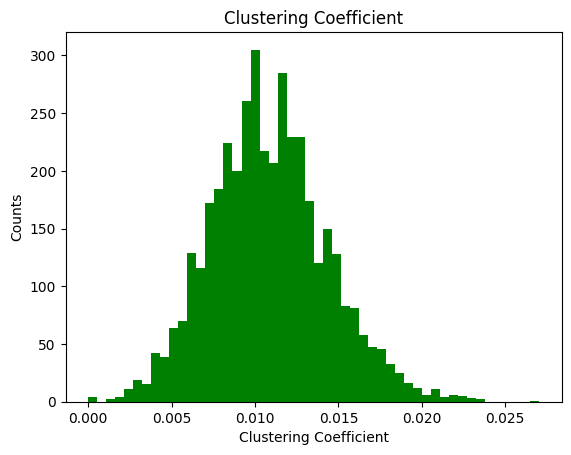

In [177]:
# plotting lustering coefficient of rendom graph
plt.hist(nx.clustering(random_graph_generated).values(), bins=50, color='green')
plt.title("Clustering Coefficient")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

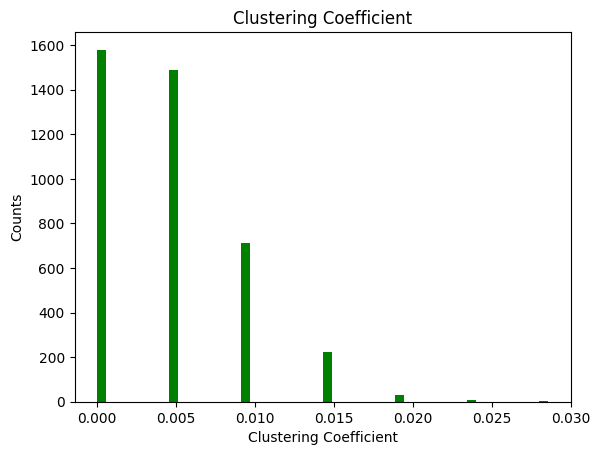

In [178]:
# plotting lustering coefficient of regular graph
plt.hist(nx.clustering(regular_graph_generated).values(), bins=50, color='green')
plt.title("Clustering Coefficient")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Counts")

From the coefficient histogram we can see the highest count of the nodes reside towards the 1.0 and this might be possible due to the high number of nodes available in the network. Also the most nodes lie just off from 0.4 to 0.7 and a bit upwards probably according the visual infromation. Also the new nodes addition to the network can form between the nodes as a node will be linked to a friend. for example, a new user will link himself/herself to a friend on the network so the new node will be place between a existing link. 


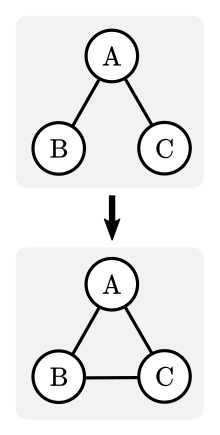

In [180]:
triangles = list(nx.triangles(facebook_graph).values())
sum(triangles) / 3 

1612010.0

In [183]:
mean = np.mean(triangles)
median = np.median(triangles)
mean, median

(1197.3334983906907, 161.0)